### 이서윤 2022159080

https://www.data4library.kr/openDataL 사이트에서 "성동구립성수도서관 장서 대출 목록"을 다운로드 받아 데이터를 분석한다.

"성동구립성수도서관 장서 대출목록 (2023년 05월)"과 "성동구립성수도서관 장서 대출목록 (2017년 05월)" 데이터를 비교하여 어떠한 변화가 있는 지 아래와 같은 부분을 확인하면서 살펴보고 그 결과를 notebook에서 output으로 출력하여 파일을 제출한다.

 

1. 2017년 5월과 비교하여 2023년 5월 시점에서 추가된 도서의 목록 및 개수

2. 2017년 5월과 비교하여 2023년 5월 시점에서 없어진 도서의 목록 및 개수

3. 2017년 5월과 2023년 5월 가장 대출이 많이 발생한 도서 상위 20권의 리스트와 그 빈도수 비교

4. 2017년 5월과 2023년 5월 가장 대출이 많이 발생한 도서 상위 100권 중 동일한 도서의 리스트와 그 개수 (100권이 적당하지 않으면 숫자를 조정 가능)

5. 2017년 5월 가장 대출이 많이 발생한 도서 상위 50권의 당시 대출 횟수와 현재 대출 횟수 비교하여 증가한 도서와 감소한 도서 파악, 그래프로 표현

6. 위의 통계를 도출하면서 필요한 전처리 (중복 제거, 누락값 처리, 잘못된 값 처리 등)를 강의 내용을 참고하여 수행

7. 위의 통계 외에도 2017년과 2023년을 비교하기에 유의미하다고 여겨지는 분석을 각자 수행하고 그 결과물을 그래프로 표현. 결과에 대한 분석을 코드에 추가 (텍스트, 주석 등)

In [1]:
# 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 파일 로드, dataframe 로 받음
file_2017 = '성동구립성수도서관 도서 대출목록 (2017년 05월).xlsx'
file_2023 = '성동구립성수도서관 장서 대출목록 (2023년 05월).xlsx'
df_2017 = pd.read_excel(file_2017)
df_2023 = pd.read_excel(file_2023)

In [3]:
# 2017 년 도서목록
df_2017.head()

,관리번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,68795840,닥터 스트레인지,스콧 데릭슨 감독,월트디즈니,2017,8809505721104,NaN,NaN,NaN,688.2,1,0,2017-05-30
1,68795837,바다의 뚜껑,도요시마 케이스케 감독,인조인간,2017,8809520440318,NaN,NaN,NaN,688.2,1,0,2017-05-30
2,68795834,모아나,론 클레멘츠 감독,월트디즈니,2017,8809505721166,NaN,NaN,NaN,688.6,1,0,2017-05-30
3,68795835,리틀 프린세스 소피아:비밀의 도서관,제이미 밋첼 감독,월트디즈니,2017,8809505721067,NaN,NaN,NaN,688.6,1,0,2017-05-30
4,68795842,국가대표 2,김종현 감독,비디오여행,2017,8809308189422,NaN,NaN,NaN,688.2,1,0,2017-05-30


In [4]:
# 2023 년 도서목록
df_2023.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,"열다섯, 비밀의 온도",이진미 지음,초록서재,2023,9791192273099,NaN,4,NaN,813.7,1,0,2023-05-31
1,2,결정 거부자,설흔 지음,우리학교,2023,9791167552051,NaN,4,NaN,813.7,1,0,2023-05-31
2,3,풍수전쟁,김진명 지음,이타북스,2023,9791167763846,NaN,0,NaN,813.7,1,0,2023-05-31
3,4,울트라셀프,이리앨 지음,다산북스,2023,9791130655550,NaN,0,NaN,325.211,1,0,2023-05-31
4,5,마녀가 되는 주문,단요 지음,책폴,2023,9791198176561,NaN,4,NaN,813.7,1,0,2023-05-31


In [5]:
# 필요한 공통 column을 정의함
common_columns = ['도서명','저자','출판사','발행년도','ISBN','부가기호','권','주제분류번호','도서권수','대출건수','등록일자']

df_17 = df_2017[common_columns]
df_23 = df_2023[common_columns]

In [6]:
print(len(df_17))
df_17.head()

44848


,도서명,저자,출판사,발행년도,ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,닥터 스트레인지,스콧 데릭슨 감독,월트디즈니,2017,8809505721104,NaN,NaN,688.2,1,0,2017-05-30
1,바다의 뚜껑,도요시마 케이스케 감독,인조인간,2017,8809520440318,NaN,NaN,688.2,1,0,2017-05-30
2,모아나,론 클레멘츠 감독,월트디즈니,2017,8809505721166,NaN,NaN,688.6,1,0,2017-05-30
3,리틀 프린세스 소피아:비밀의 도서관,제이미 밋첼 감독,월트디즈니,2017,8809505721067,NaN,NaN,688.6,1,0,2017-05-30
4,국가대표 2,김종현 감독,비디오여행,2017,8809308189422,NaN,NaN,688.2,1,0,2017-05-30


In [7]:
## 데이터 클리닝을 위해 숫자를 제외한 불필요한 string 을 제거함
df_17['발행년도'] = df_17['발행년도'].str.replace(r'\D', '')
df_23['발행년도'] = df_23['발행년도'].str.replace(r'\D', '')

In [8]:
## 발행년도 column에 Null data 채움 발행년미상 은 기존에 있음
df_17['발행년도'] = df_17['발행년도'].fillna('발행년미상')
df_23['발행년도'] = df_23['발행년도'].fillna('발행년미상')

In [9]:
# 도서를 Unique 하게 구별할 수 있는 column을 만듬 (관리번호는 2017년 data만 있음)
df_17['ISBN_date'] = df_17['ISBN'].astype(str) +"_"+ df_17['발행년도'].astype(str) + "_"+ df_17['등록일자'].astype(str)
df_23['ISBN_date'] = df_23['ISBN'].astype(str) +"_"+ df_23['발행년도'].astype(str) + "_"+ df_23['등록일자'].astype(str)

# 문제1. 2017년 5월과 비교하여 2023년 5월 시점에서 추가된 도서의 목록 및 개수

In [10]:
# 23년 data에서 17년 data가 포함된 data를 제외한 순수 23년도 data를 가져옴
df_new_book_in23 = df_23[~df_23['ISBN_date'].isin(df_17['ISBN_date'])]
df_new_book_in23

,도서명,저자,출판사,발행년도,ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,ISBN_date
0,"열다섯, 비밀의 온도",이진미 지음,초록서재,2023,9791192273099,4,NaN,813.7,1,0,2023-05-31,9791192273099_2023_2023-05-31
1,결정 거부자,설흔 지음,우리학교,2023,9791167552051,4,NaN,813.7,1,0,2023-05-31,9791167552051_2023_2023-05-31
2,풍수전쟁,김진명 지음,이타북스,2023,9791167763846,0,NaN,813.7,1,0,2023-05-31,9791167763846_2023_2023-05-31
3,울트라셀프,이리앨 지음,다산북스,2023,9791130655550,0,NaN,325.211,1,0,2023-05-31,9791130655550_2023_2023-05-31
4,마녀가 되는 주문,단요 지음,책폴,2023,9791198176561,4,NaN,813.7,1,0,2023-05-31,9791198176561_2023_2023-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...
64130,What do you hear when cows sing?:,by Marco Maestro;Giulio Maestro;pictures by Gi...,HarperCollins Publishers,1996,9780064442275,5,NaN,747,1,35,2012-08-06,9780064442275_1996_2012-08-06
64297,(The)case of the scaredy cats,by Crosby Bonsall,Harpercollins Childrens Books,1971,9780064440479,5,NaN,747,1,33,2012-08-06,9780064440479_1971_2012-08-06
64357,Night of the ninjas,by Mary Pope Osborne;illustrated by Sal Murdocca,Random House,1995,9780679863717,5,NaN,843,1,56,2012-08-06,9780679863717_1995_2012-08-06
64404,If you take a mouse to the movies,By Laura Numeroff;Illustrated by Felicia Bond,HarperCollins,2000,9780060278670,5,NaN,808.9,1,42,2012-08-06,9780060278670_2000_2012-08-06


In [11]:
len(df_new_book_in23)

37792

# 문제2. 2017년 5월과 비교하여 2023년 5월 시점에서 없어진 도서의 목록 및 개수

In [12]:
# 17년 data에서 23년 data가 포함된 data를 제외한 순수 17년도 data를 가져옴
df_old_book_in17 = df_17[~df_17['ISBN_date'].isin(df_23['ISBN_date'])]
df_old_book_in17

,도서명,저자,출판사,발행년도,ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,ISBN_date
19,수수께끼로 동시 쓰기 365.^1,문삼석 글·그림,계수나무,2015,9788989654810,NaN,1.0,811.8,1,0,2017-05-25,9788989654810_2015_2017-05-25
33,노란 난쟁이,"앤드류 랭 엮음, 이창호 옮김 , 최수은 그림",NaN,2017,9788998427115,NaN,NaN,843.6,1,0,2017-05-25,9788998427115_2017_2017-05-25
34,아찔아찔 높이 솟은 집,"게리 베일리 글, 모레노 키아키에라 , 미셀 토드 , 조엘 드레드미 [공]그림 , ...",서울개암나무,2017,9788968303586,NaN,2.0,540,1,0,2017-05-25,9788968303586_2017_2017-05-25
44,요즘 제주:SNS에 없는 취향저격 제주여행,"염관식, 옥미혜 지음",NaN,2017,9788925561677,NaN,NaN,981.19902,1,0,2017-05-19,9788925561677_2017_2017-05-19
45,기억술사:오리가미 교야 장편소설.//기억을 지우는 사람^1,"오리가미 교야 지음, 서혜영 옮김",NaN,2017,9788950969639,NaN,1.0,833.6,1,1,2017-05-19,9788950969639_2017_2017-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...
44808,수리수리 얍!,양승현 글 ;최영화 그림,서울:한국헤밍웨이,2006,9788954807937,NaN,211.0,410.8,1,20,2012-08-06,9788954807937_2006_2012-08-06
44809,돌돌이가 송송이네 집에 가요,엄혜숙 글 ;이지희 그림,서울:한국헤밍웨이,2006,9788954808002,NaN,218.0,410.8,1,17,2012-08-06,9788954808002_2006_2012-08-06
44810,재주 많은 개구리,김수희 글 ;구분선 그림,서울:한국헤밍웨이,2006,9788954808248,NaN,46.0,410.8,1,12,2012-08-06,9788954808248_2006_2012-08-06
44816,쿠키 한 입의 인생 수업,에이미 크루즈 로젠탈 글 ;제인 다이어 그림 ;김지선 옮김,책읽는곰,2012,9788996017042,NaN,1.0,199.1,1,29,2012-08-06,9788996017042_2012_2012-08-06


In [13]:
len(df_old_book_in17)

19290

# 문제3. 2017년 5월과 2023년 5월 가장 대출이 많이 발생한 도서 상위 20권의 리스트와 그 빈도수 비교

In [14]:
# 대출건수 column의 값으로 dataframe을 정령 top 20만 고름
df_17_top_rental_20 = df_17.sort_values(by='대출건수', ascending=False).head(20)

In [15]:
df_17_top_rental_20

,도서명,저자,출판사,발행년도,ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,ISBN_date
34789,황태자비 납치사건,김진명 지음,서울 :새움출판사,2011,9788993964134,NaN,NaN,813.6,1,1596,2012-09-11,9788993964134_2011_2012-09-11
36585,"식객, 팔도를 간다. //경기편/ ^2",허영만 글·그림,파주 :김영사,2012,9788934941958,NaN,2.0,594.51,1,1590,2012-09-11,9788934941958_2012_2012-09-11
15971,유대인 하브루타 경제교육 ;꼬마 버핏은 어떻게 경제를 공부했을까,전성수 ;양동일 [공]지음,서울 :매일경제신문사 :,2014,9791155421017,NaN,NaN,598.1,1,1506,2014-05-13,9791155421017_2014_2014-05-13
12655,퀴르발 남작의 성 :최제훈 소설집/,[최제훈 지음],"서울 :문학과지성사,",2010,9788932020525,NaN,NaN,813.6,1,1499,2014-10-31,9788932020525_2010_2014-10-31
26021,(절대 배신하지 않는)돈의 습관= =Absolute savings/,우용표 지음,서울 :헬스조선,2013,9791185020013,NaN,NaN,327.04,1,1487,2013-05-16,9791185020013_2013_2013-05-16
38004,내일은 실험왕.//빛의 대결^3,"곰돌이 co. 글, 홍종현 그림",아이세움,2007,9788937842214,NaN,3.0,407,1,129,2012-09-10,9788937842214_2007_2012-09-10
38754,내일은 실험왕.//물의 대결^11,"곰돌이 co. 글, 홍종현 그림",아이세움,2009,9788937847639,NaN,11.0,407,1,127,2012-09-10,9788937847639_2009_2012-09-10
31234,(수학 유령의)미스터리 암호수학 /,정재은 지음 ;김현민 그림,서울 :글송이,2012,9788955726718,NaN,NaN,410,1,125,2012-10-22,9788955726718_2012_2012-10-22
37624,내일은 실험왕.//열의 대결^10,"곰돌이 co. 글, 홍종현 그림",서울 :대한교과서,2009,9788937842283,NaN,10.0,407,1,123,2012-09-10,9788937842283_2009_2012-09-10
38843,내일은 실험왕.//날씨의 대결^9,"곰돌이 co. 글, 홍종현 그림",아이세움,2009,9788937842269,NaN,9.0,407,1,121,2012-09-10,9788937842269_2009_2012-09-10


In [16]:
len(df_17_top_rental_20)

20

In [17]:
# 대출건수 column의 값으로 dataframe을 정령 top 20만 고름
df_23_top_rental_20 = df_23.sort_values(by='대출건수', ascending=False).head(20)

In [18]:
df_23_top_rental_20

,도서명,저자,출판사,발행년도,ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,ISBN_date
47126,살인자의 기억법:,김영하 지음,문학동네,2013,9788954622035,0,NaN,813.6,1,194,2013-09-14,9788954622035_2013_2013-09-14
52814,나미야 잡화점의 기적:히가시노 게이고 장편소설,히가시노 게이고 지음;양윤옥 옮김,현대문학,2013,9788972756194,0,NaN,833.6,1,183,2013-02-27,9788972756194_2013_2013-02-27
61098,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,7,NaN,833.8,1,173,2012-08-09,9788950925161_2012_2012-08-09
55411,해리포터와 마법사의 돌,조앤 K. 롤링 지음;김혜원 옮김,문학수첩,2012,9788983920690,0,NaN,843,1,169,2012-09-11,9788983920690_2012_2012-09-11
57976,식객=食客,허영만 글·그림,김영사,2010,9788934926467,0,NaN,594.51,1,164,2012-09-11,9788934926467_2010_2012-09-11
58334,(엽기 과학자)프래니,짐 벤튼 글·그림;박수현 옮김,언어세상,2006,9788955856231,7,NaN,843,1,163,2012-09-10,9788955856231_2006_2012-09-10
59879,7년의 밤 :정유정 장편소설,정유정 지음,은행나무,2011,9788956604992,0,NaN,813.6,1,162,2012-09-09,9788956604992_2011_2012-09-09
60580,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2010,9788950922443,7,NaN,833.8,1,162,2012-08-09,9788950922443_2010_2012-08-09
60579,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2011,9788950922443,7,NaN,833.8,1,157,2012-08-09,9788950922443_2011_2012-08-09
58333,(엽기 과학자)프래니,짐 벤튼 글·그림;박수현 옮김,언어세상,2006,9788955856248,7,NaN,843,1,155,2012-09-10,9788955856248_2006_2012-09-10


In [19]:
len(df_23_top_rental_20)

20

## 빈도수 비교

In [20]:
print("2017년 top 20 대출건수 총합:", df_17_top_rental_20['대출건수'].sum(), "\n2023년 top 20 대출건수 총합:", df_23_top_rental_20['대출건수'].sum())

2017년 top 20 대출건수 총합: 9458 
2023년 top 20 대출건수 총합: 3168


# 문제4. 2017년 5월과 2023년 5월 가장 대출이 많이 발생한 도서 상위 100권 중 동일한 도서의 리스트와 그 개수 (100권이 적당하지 않으면 숫자를 조정 가능)

In [21]:
# 대출건수 column의 값으로 dataframe을 정령 top 100 만 고름
df_17_top_rental_100 = df_17.sort_values(by='대출건수', ascending=False).head(100)
df_23_top_rental_100 = df_23.sort_values(by='대출건수', ascending=False).head(100)

In [22]:
df_17_23_common_top_book = df_23_top_rental_100[df_23_top_rental_100['ISBN_date'].isin(df_17_top_rental_100['ISBN_date'])]
df_17_23_common_top_book

,도서명,저자,출판사,발행년도,ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,ISBN_date
47126,살인자의 기억법:,김영하 지음,문학동네,2013,9788954622035,0,NaN,813.6,1,194,2013-09-14,9788954622035_2013_2013-09-14
61098,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,7,NaN,833.8,1,173,2012-08-09,9788950925161_2012_2012-08-09
57976,식객=食客,허영만 글·그림,김영사,2010,9788934926467,0,NaN,594.51,1,164,2012-09-11,9788934926467_2010_2012-09-11
60580,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2010,9788950922443,7,NaN,833.8,1,162,2012-08-09,9788950922443_2010_2012-08-09
57975,식객=食客,허영만 글·그림,김영사,2010,9788934926474,0,NaN,594.51,1,154,2012-09-11,9788934926474_2010_2012-09-11
58289,내일은 실험왕,곰돌이 co. 글 ;홍종현 그림,대한교과서,2009,9788937842269,7,NaN,407,1,148,2012-09-10,9788937842269_2009_2012-09-10
60619,윔피키드:소심 초딩의 카툰 일기,제프 키니 글·그림;양진성 옮김,푸른날개,2012,9788993055016,7,NaN,843,1,146,2012-08-09,9788993055016_2012_2012-08-09
52424,(수학유령의)미스터리? 탐정수학:미스터리 수학,정재은 지음;김현민 그림,글송이,2012,9788955726626,7,NaN,410,1,145,2013-03-16,9788955726626_2012_2013-03-16
61307,윔피키드,제프 키니 글·그림;양진성 옮김,푸른날개,2012,9788965590262,7,NaN,843,1,144,2012-08-09,9788965590262_2012_2012-08-09
61155,쾌걸 조로리,하라 유타카 글·그림;오용택 옮김,북이십일,2010,9788950922429,7,NaN,833.8,1,143,2012-08-09,9788950922429_2010_2012-08-09


In [23]:
print("도서 상위 100권 중 동일한 도서의 개수:", len(df_17_23_common_top_book))

도서 상위 100권 중 동일한 도서의 개수: 22


# 문제5. 2017년 5월 가장 대출이 많이 발생한 도서 상위 50권의 당시 대출 횟수와 현재 대출 횟수 비교하여 증가한 도서와 감소한 도서 파악, 그래프로 표현

In [24]:
# 대출건수 column의 값으로 dataframe을 정령 top 50만 고름

df_17_top_rental_50 = df_17.sort_values(by='대출건수', ascending=False).head(50)
df_23_top_rental_50 = df_23.sort_values(by='대출건수', ascending=False).head(50)

In [25]:
print("2017년 top 50 대출건수 총합:", df_17_top_rental_50['대출건수'].sum(), "\n2023년 top 50 대출건수 총합:", df_23_top_rental_50['대출건수'].sum())

2017년 top 50 대출건수 총합: 12635 
2023년 top 50 대출건수 총합: 7189


In [26]:
# 공통된 top rental dataframe중에 17년도 data를 가져옴
df_17_23_common_top50_book = df_17_top_rental_50[df_17_top_rental_50['ISBN_date'].isin(df_23_top_rental_50['ISBN_date'])]
df_17_top_rantal = df_17[df_17['ISBN_date'].isin(df_17_23_common_top50_book['ISBN_date'])]

In [27]:
df_17_top_rantal

,도서명,저자,출판사,발행년도,ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,ISBN_date
21094,살인자의 기억법 :김영하 장편소설,김영하 지음,"파주 :문학동네,",2013,9788954622035,NaN,NaN,813.6,1,113,2013-09-14,9788954622035_2013_2013-09-14
32968,식객//맛의 시작=食客.^1,허영만 글·그림,김영사,2010,9788934926467,NaN,1.0,594.51,1,115,2012-09-11,9788934926467_2010_2012-09-11
33283,식객//진수성찬을 차려라=食客.^2,허영만 글·그림,김영사,2010,9788934926474,NaN,2.0,594.51,1,113,2012-09-11,9788934926474_2010_2012-09-11
33855,"식객, 팔도를 간다. //서울편/ ^3",허영만 글·그림,파주 :김영사,2012,9788934947219,NaN,3.0,594.51,1,104,2012-09-11,9788934947219_2012_2012-09-11
37626,(Who?)밥 말리=Bob Marley,"한나나 글, 흰수염고래 그림",서울 :다산북스,2012,9788963702407,NaN,60.0,990,1,70,2012-09-10,9788963702407_2012_2012-09-10
37799,(Who?)마리아 몬테소리=Maria Montessori,"이동규 글, 오천년 그림",서울 :다산북스,2012,9788963702407,NaN,58.0,990,1,104,2012-09-10,9788963702407_2012_2012-09-10
37912,Why? 세종대왕,"그림나무 글, 이두원 그림",서울 :예림당,2012,9788930232197,NaN,2.0,990,1,108,2012-09-10,9788930232197_2012_2012-09-10
38167,(Who?)레오나르도 다 빈치=Leonardo da Vinci,"안형모 글, 최병국 그림",서울 :다산북스,2012,9788963702407,NaN,51.0,990,1,97,2012-09-10,9788963702407_2012_2012-09-10
38445,(Who?)마일스 데이비스=Miles Davis,"오영석 글, 이종원 그림",서울 :다산북스,2012,9788963702407,NaN,55.0,990,1,68,2012-09-10,9788963702407_2012_2012-09-10
38843,내일은 실험왕.//날씨의 대결^9,"곰돌이 co. 글, 홍종현 그림",아이세움,2009,9788937842269,NaN,9.0,407,1,121,2012-09-10,9788937842269_2009_2012-09-10


In [28]:
# df_17_23_common_top50_book = df_17_top_rental_50[df_17_top_rental_50['ISBN_date'].isin(df_23_top_rental_50['ISBN_date'])]
df_23_top_rantal = df_23[df_23['ISBN_date'].isin(df_17_23_common_top50_book['ISBN_date'])]
df_23_top_rantal

,도서명,저자,출판사,발행년도,ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,ISBN_date
47126,살인자의 기억법:,김영하 지음,문학동네,2013,9788954622035,0,NaN,813.6,1,194,2013-09-14,9788954622035_2013_2013-09-14
57695,"식객, 팔도를 간다",허영만 글·그림,김영사,2012,9788934947219,0,NaN,594.51,1,134,2012-09-11,9788934947219_2012_2012-09-11
57975,식객=食客,허영만 글·그림,김영사,2010,9788934926474,0,NaN,594.51,1,154,2012-09-11,9788934926474_2010_2012-09-11
57976,식객=食客,허영만 글·그림,김영사,2010,9788934926467,0,NaN,594.51,1,164,2012-09-11,9788934926467_2010_2012-09-11
58289,내일은 실험왕,곰돌이 co. 글 ;홍종현 그림,대한교과서,2009,9788937842269,7,NaN,407,1,148,2012-09-10,9788937842269_2009_2012-09-10
58606,(Who?)밥 말리 =Bob Marley,한나나 글 ;흰수염고래 그림,다산북스,2012,9788963702407,1,NaN,990,1,83,2012-09-10,9788963702407_2012_2012-09-10
58607,(Who?)마리아 몬테소리 =Maria Montessori,이동규 글 ;오천년 그림,다산북스,2012,9788963702407,1,NaN,990,1,126,2012-09-10,9788963702407_2012_2012-09-10
58608,(Who?)마일스 데이비스 =Miles Davis,오영석 글 ;이종원 그림,다산북스,2012,9788963702407,1,NaN,990,1,78,2012-09-10,9788963702407_2012_2012-09-10
58609,(Who?)레오나르도 다 빈치 =Leonardo da Vinci,안형모 글 ;최병국 그림,다산북스,2012,9788963702407,1,NaN,990,1,134,2012-09-10,9788963702407_2012_2012-09-10
58706,Why? 세종대왕,그림나무 글 ;이두원 그림,예림당,2012,9788930232197,7,NaN,990,1,131,2012-09-10,9788930232197_2012_2012-09-10


In [29]:
# data를 merge하기전에 column name 변경
df_17_top_rantal.rename(columns = {'대출건수' : '대출건수17'}, inplace = True)
df_23_top_rantal.rename(columns = {'대출건수' : '대출건수23'}, inplace = True)


In [30]:
# 같은 ISBN_date column 으로 merge함.
df_common_top_rantal = pd.merge(df_17_top_rantal, df_23_top_rantal, on="ISBN_date")

len(df_common_top_rantal)
df_common_top_rantal

,도서명_x,저자_x,출판사_x,발행년도_x,ISBN_x,부가기호_x,권_x,주제분류번호_x,도서권수_x,대출건수17,...,저자_y,출판사_y,발행년도_y,ISBN_y,부가기호_y,권_y,주제분류번호_y,도서권수_y,대출건수23,등록일자_y
0,살인자의 기억법 :김영하 장편소설,김영하 지음,"파주 :문학동네,",2013,9788954622035,NaN,NaN,813.6,1,113,...,김영하 지음,문학동네,2013,9788954622035,0,NaN,813.6,1,194,2013-09-14
1,식객//맛의 시작=食客.^1,허영만 글·그림,김영사,2010,9788934926467,NaN,1.0,594.51,1,115,...,허영만 글·그림,김영사,2010,9788934926467,0,NaN,594.51,1,164,2012-09-11
2,식객//진수성찬을 차려라=食客.^2,허영만 글·그림,김영사,2010,9788934926474,NaN,2.0,594.51,1,113,...,허영만 글·그림,김영사,2010,9788934926474,0,NaN,594.51,1,154,2012-09-11
3,"식객, 팔도를 간다. //서울편/ ^3",허영만 글·그림,파주 :김영사,2012,9788934947219,NaN,3.0,594.51,1,104,...,허영만 글·그림,김영사,2012,9788934947219,0,NaN,594.51,1,134,2012-09-11
4,(Who?)밥 말리=Bob Marley,"한나나 글, 흰수염고래 그림",서울 :다산북스,2012,9788963702407,NaN,60.0,990,1,70,...,한나나 글 ;흰수염고래 그림,다산북스,2012,9788963702407,1,NaN,990,1,83,2012-09-10
5,(Who?)밥 말리=Bob Marley,"한나나 글, 흰수염고래 그림",서울 :다산북스,2012,9788963702407,NaN,60.0,990,1,70,...,이동규 글 ;오천년 그림,다산북스,2012,9788963702407,1,NaN,990,1,126,2012-09-10
6,(Who?)밥 말리=Bob Marley,"한나나 글, 흰수염고래 그림",서울 :다산북스,2012,9788963702407,NaN,60.0,990,1,70,...,오영석 글 ;이종원 그림,다산북스,2012,9788963702407,1,NaN,990,1,78,2012-09-10
7,(Who?)밥 말리=Bob Marley,"한나나 글, 흰수염고래 그림",서울 :다산북스,2012,9788963702407,NaN,60.0,990,1,70,...,안형모 글 ;최병국 그림,다산북스,2012,9788963702407,1,NaN,990,1,134,2012-09-10
8,(Who?)마리아 몬테소리=Maria Montessori,"이동규 글, 오천년 그림",서울 :다산북스,2012,9788963702407,NaN,58.0,990,1,104,...,한나나 글 ;흰수염고래 그림,다산북스,2012,9788963702407,1,NaN,990,1,83,2012-09-10
9,(Who?)마리아 몬테소리=Maria Montessori,"이동규 글, 오천년 그림",서울 :다산북스,2012,9788963702407,NaN,58.0,990,1,104,...,이동규 글 ;오천년 그림,다산북스,2012,9788963702407,1,NaN,990,1,126,2012-09-10


In [31]:
# 같은 발행년도, ISBN, 등록일자를 가지고 있다면 같은 책으로 취급하였습니다.
df_common_top_rantal_unique = df_common_top_rantal.drop_duplicates(subset=["ISBN_date"], keep=False)
df_common_top_rantal_unique

,도서명_x,저자_x,출판사_x,발행년도_x,ISBN_x,부가기호_x,권_x,주제분류번호_x,도서권수_x,대출건수17,...,저자_y,출판사_y,발행년도_y,ISBN_y,부가기호_y,권_y,주제분류번호_y,도서권수_y,대출건수23,등록일자_y
0,살인자의 기억법 :김영하 장편소설,김영하 지음,"파주 :문학동네,",2013,9788954622035,NaN,NaN,813.6,1,113,...,김영하 지음,문학동네,2013,9788954622035,0,NaN,813.6,1,194,2013-09-14
1,식객//맛의 시작=食客.^1,허영만 글·그림,김영사,2010,9788934926467,NaN,1.0,594.51,1,115,...,허영만 글·그림,김영사,2010,9788934926467,0,NaN,594.51,1,164,2012-09-11
2,식객//진수성찬을 차려라=食客.^2,허영만 글·그림,김영사,2010,9788934926474,NaN,2.0,594.51,1,113,...,허영만 글·그림,김영사,2010,9788934926474,0,NaN,594.51,1,154,2012-09-11
3,"식객, 팔도를 간다. //서울편/ ^3",허영만 글·그림,파주 :김영사,2012,9788934947219,NaN,3.0,594.51,1,104,...,허영만 글·그림,김영사,2012,9788934947219,0,NaN,594.51,1,134,2012-09-11
20,Why? 세종대왕,"그림나무 글, 이두원 그림",서울 :예림당,2012,9788930232197,NaN,2.0,990,1,108,...,그림나무 글 ;이두원 그림,예림당,2012,9788930232197,7,NaN,990,1,131,2012-09-10
21,내일은 실험왕.//날씨의 대결^9,"곰돌이 co. 글, 홍종현 그림",아이세움,2009,9788937842269,NaN,9.0,407,1,121,...,곰돌이 co. 글 ;홍종현 그림,대한교과서,2009,9788937842269,7,NaN,407,1,148,2012-09-10
22,쾌걸 조로리. //공포의 점프 ^21,하라 유타카 글·그림 ;오용택 옮김,을파소,2012,9788950925161,NaN,21.0,833.8,1,116,...,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,7,NaN,833.8,1,173,2012-08-09
23,쾌걸 조로리. //거대한 공룡 ^7,하라 유타카 글·그림 ;오용택 옮김,을파소,2010,9788950922429,NaN,7.0,833.8,1,101,...,하라 유타카 글·그림;오용택 옮김,북이십일,2010,9788950922429,7,NaN,833.8,1,143,2012-08-09
24,쾌걸 조로리.//엄마 사랑해요^9,"하라 유타카 글·그림, 오용택 옮김",을파소,2010,9788950922443,NaN,9.0,833.8,1,100,...,하라 유타카 글·그림;오용택 옮김,북이십일,2010,9788950922443,7,NaN,833.8,1,162,2012-08-09


In [32]:
# 필요한 column만 필터링 했습니다.
df_common_top_rantal_filtered = df_common_top_rantal_unique[['ISBN_date','대출건수17','대출건수23']]
df_common_top_rantal_filtered

,ISBN_date,대출건수17,대출건수23
0,9788954622035_2013_2013-09-14,113,194
1,9788934926467_2010_2012-09-11,115,164
2,9788934926474_2010_2012-09-11,113,154
3,9788934947219_2012_2012-09-11,104,134
20,9788930232197_2012_2012-09-10,108,131
21,9788937842269_2009_2012-09-10,121,148
22,9788950925161_2012_2012-08-09,116,173
23,9788950922429_2010_2012-08-09,101,143
24,9788950922443_2010_2012-08-09,100,162


In [33]:
# 대출건수가 늘어난, 줄어든 list를 추줄하기 위해 numpy 배열로 변경
np_top_book = df_common_top_rantal_filtered.to_numpy()

In [34]:
# 배열하나씩 비교하면서 rental 수가 줄어든, 늘어난 list에 추가함
list_book_down = []
list_book_up = []
for book in np_top_book:
    if book[1] < book[2]:
        list_book_up.append(book[0])
    else:
        list_book_down.append(book[0])
        
list_book_down

[]

In [35]:
list_book_up

['9788954622035_2013_2013-09-14',
 '9788934926467_2010_2012-09-11',
 '9788934926474_2010_2012-09-11',
 '9788934947219_2012_2012-09-11',
 '9788930232197_2012_2012-09-10',
 '9788937842269_2009_2012-09-10',
 '9788950925161_2012_2012-08-09',
 '9788950922429_2010_2012-08-09',
 '9788950922443_2010_2012-08-09']

In [36]:
df_common_top_rantal_unique

,도서명_x,저자_x,출판사_x,발행년도_x,ISBN_x,부가기호_x,권_x,주제분류번호_x,도서권수_x,대출건수17,...,저자_y,출판사_y,발행년도_y,ISBN_y,부가기호_y,권_y,주제분류번호_y,도서권수_y,대출건수23,등록일자_y
0,살인자의 기억법 :김영하 장편소설,김영하 지음,"파주 :문학동네,",2013,9788954622035,NaN,NaN,813.6,1,113,...,김영하 지음,문학동네,2013,9788954622035,0,NaN,813.6,1,194,2013-09-14
1,식객//맛의 시작=食客.^1,허영만 글·그림,김영사,2010,9788934926467,NaN,1.0,594.51,1,115,...,허영만 글·그림,김영사,2010,9788934926467,0,NaN,594.51,1,164,2012-09-11
2,식객//진수성찬을 차려라=食客.^2,허영만 글·그림,김영사,2010,9788934926474,NaN,2.0,594.51,1,113,...,허영만 글·그림,김영사,2010,9788934926474,0,NaN,594.51,1,154,2012-09-11
3,"식객, 팔도를 간다. //서울편/ ^3",허영만 글·그림,파주 :김영사,2012,9788934947219,NaN,3.0,594.51,1,104,...,허영만 글·그림,김영사,2012,9788934947219,0,NaN,594.51,1,134,2012-09-11
20,Why? 세종대왕,"그림나무 글, 이두원 그림",서울 :예림당,2012,9788930232197,NaN,2.0,990,1,108,...,그림나무 글 ;이두원 그림,예림당,2012,9788930232197,7,NaN,990,1,131,2012-09-10
21,내일은 실험왕.//날씨의 대결^9,"곰돌이 co. 글, 홍종현 그림",아이세움,2009,9788937842269,NaN,9.0,407,1,121,...,곰돌이 co. 글 ;홍종현 그림,대한교과서,2009,9788937842269,7,NaN,407,1,148,2012-09-10
22,쾌걸 조로리. //공포의 점프 ^21,하라 유타카 글·그림 ;오용택 옮김,을파소,2012,9788950925161,NaN,21.0,833.8,1,116,...,하라 유타카 글·그림;오용택 옮김,북이십일,2012,9788950925161,7,NaN,833.8,1,173,2012-08-09
23,쾌걸 조로리. //거대한 공룡 ^7,하라 유타카 글·그림 ;오용택 옮김,을파소,2010,9788950922429,NaN,7.0,833.8,1,101,...,하라 유타카 글·그림;오용택 옮김,북이십일,2010,9788950922429,7,NaN,833.8,1,143,2012-08-09
24,쾌걸 조로리.//엄마 사랑해요^9,"하라 유타카 글·그림, 오용택 옮김",을파소,2010,9788950922443,NaN,9.0,833.8,1,100,...,하라 유타카 글·그림;오용택 옮김,북이십일,2010,9788950922443,7,NaN,833.8,1,162,2012-08-09


In [37]:
df_common_top_rantal = df_common_top_rantal_unique[['도서명_x','ISBN_date','대출건수17','대출건수23']]
df_common_top_rantal.rename(columns = {'대출건수17' : 'rental17'}, inplace = True)
df_common_top_rantal.rename(columns = {'대출건수23' : 'rental23'}, inplace = True)

Text(0.5, 1.0, "2017 top rental book's rental frequency")

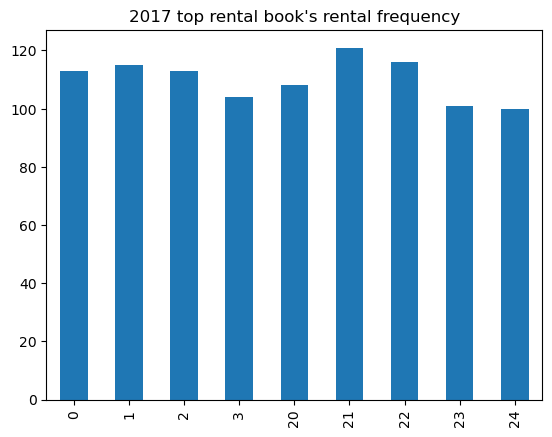

In [38]:
df_common_top_rantal['rental17'].plot(kind='bar').set_title("2017 top rental book's rental frequency")

### Bar chart로 보았을 때 모든 2023 년 rental 수가 2013년에 비해 늘어났습니다.

Text(0.5, 1.0, "2023 top rental book's rental frequency")

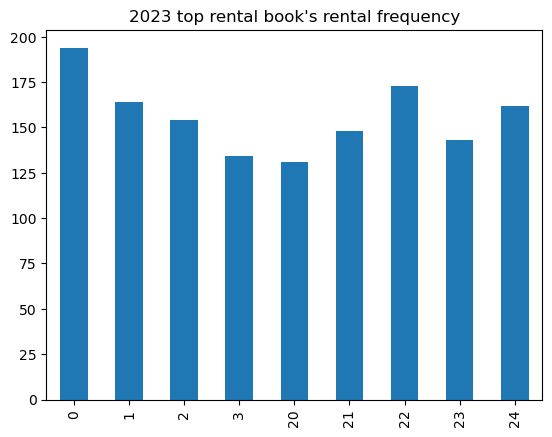

In [39]:
df_common_top_rantal['rental23'].plot(kind='bar').set_title("2023 top rental book's rental frequency")
# Bar chart로 보았을 때 모든 2023 년 rental 수가 2013년에 비해 늘어났습니다.

2023년의 대출건수가 모두 늘어난것은 2022년이전까지의 모든 data가 누적되었기 때문이라고 추정됨